In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
url = 'https://raw.githubusercontent.com/gaurav9909/Machine_Learning_Projects/main/Churn_Modelling_Prediction/Churn_Modelling%20(1).csv'
df =pd.read_csv(url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
for i in df.columns:
  print(i)

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [4]:
for i in df.columns:
  print(df[i].value_counts())
#

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88    

In [5]:
for i in df.columns:
  print(df[i].unique())
#

[    1     2     3 ...  9998  9999 10000]
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 6

In [6]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
Geography = pd.get_dummies(df.Geography).iloc[:,1:]
Gender = pd.get_dummies(df.Gender).iloc[:,1:]


In [8]:
df = pd.concat([df,Geography,Gender],axis=1)

In [9]:
df =df.drop(['Geography','Gender'],axis=1)

In [10]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [11]:
df.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0
Germany,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  bool   
 10  Spain            10000 non-null  bool   
 11  Male             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Germany'] = le.fit_transform(df['Germany'])
df['Spain'] = le.fit_transform(df['Spain'])
df['Male'] = le.fit_transform(df['Male'])

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Germany          10000 non-null  int64  
 10  Spain            10000 non-null  int64  
 11  Male             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


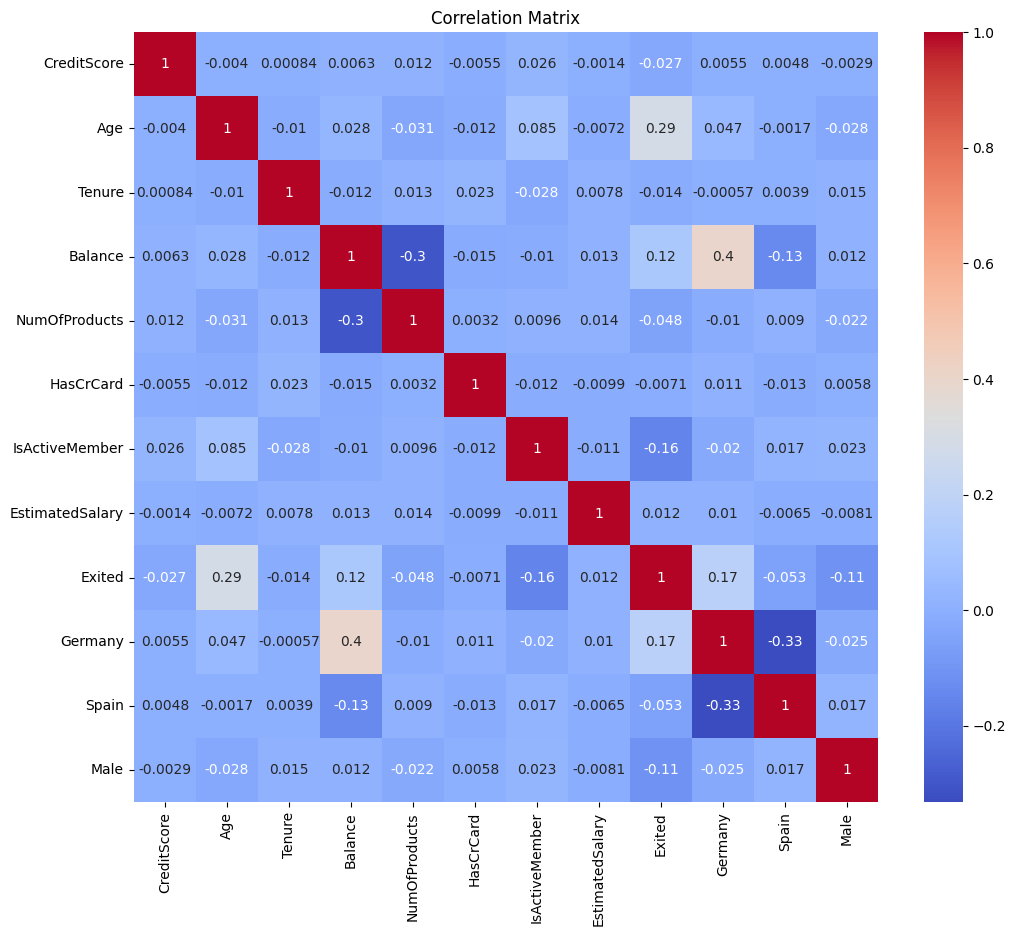

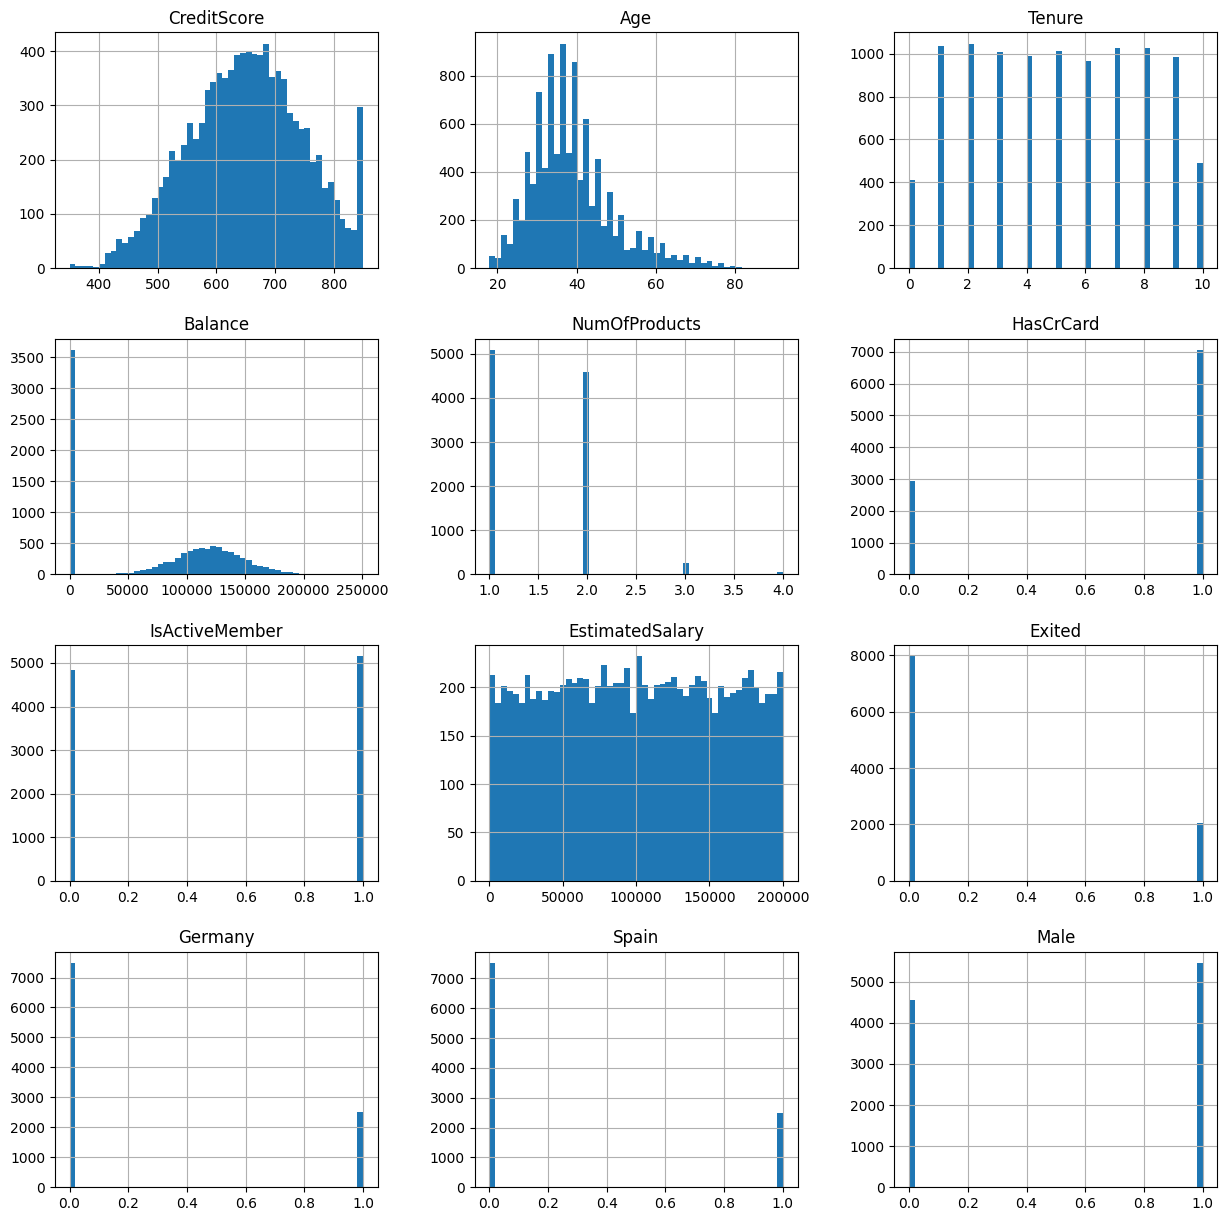

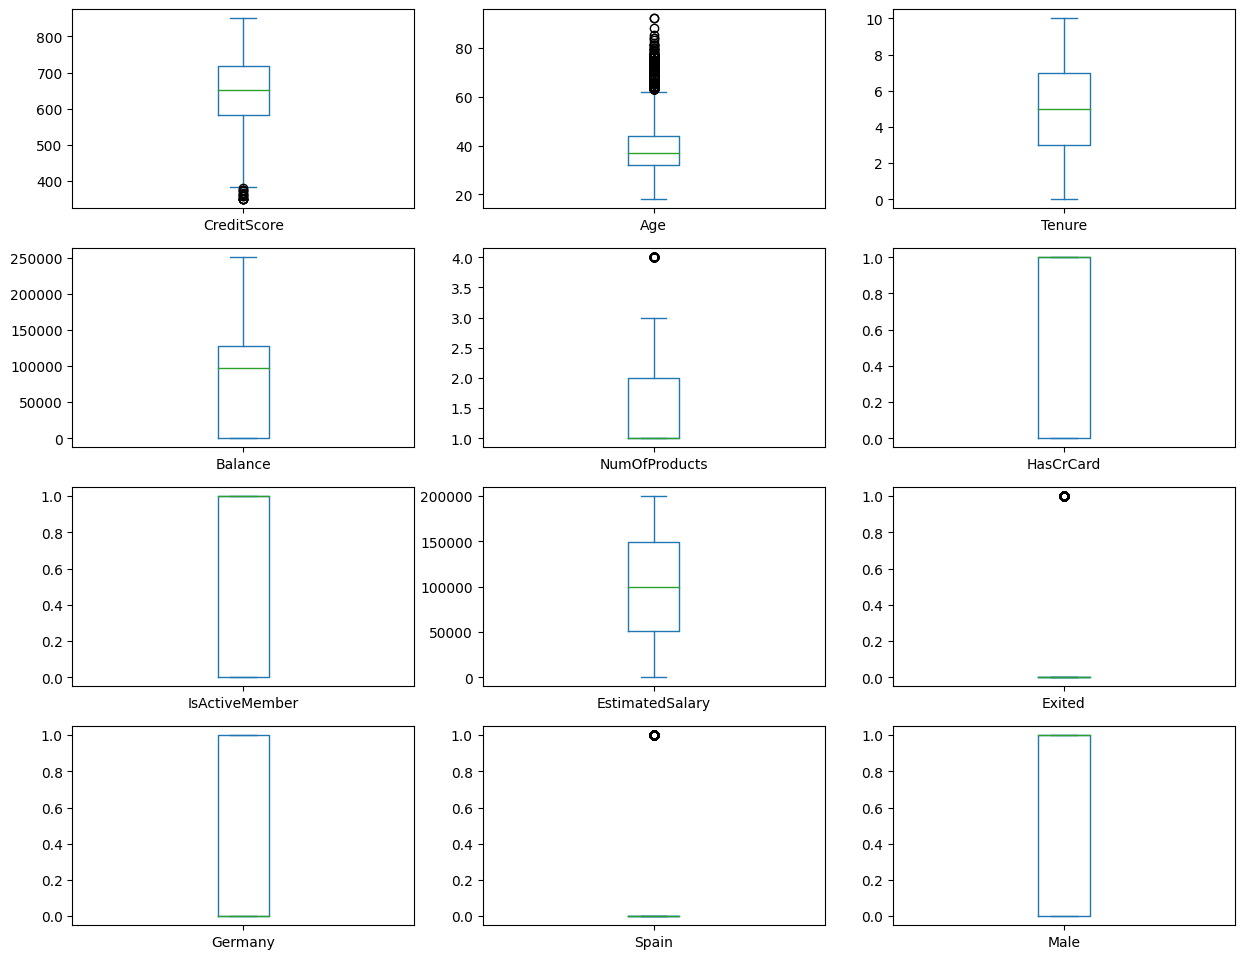

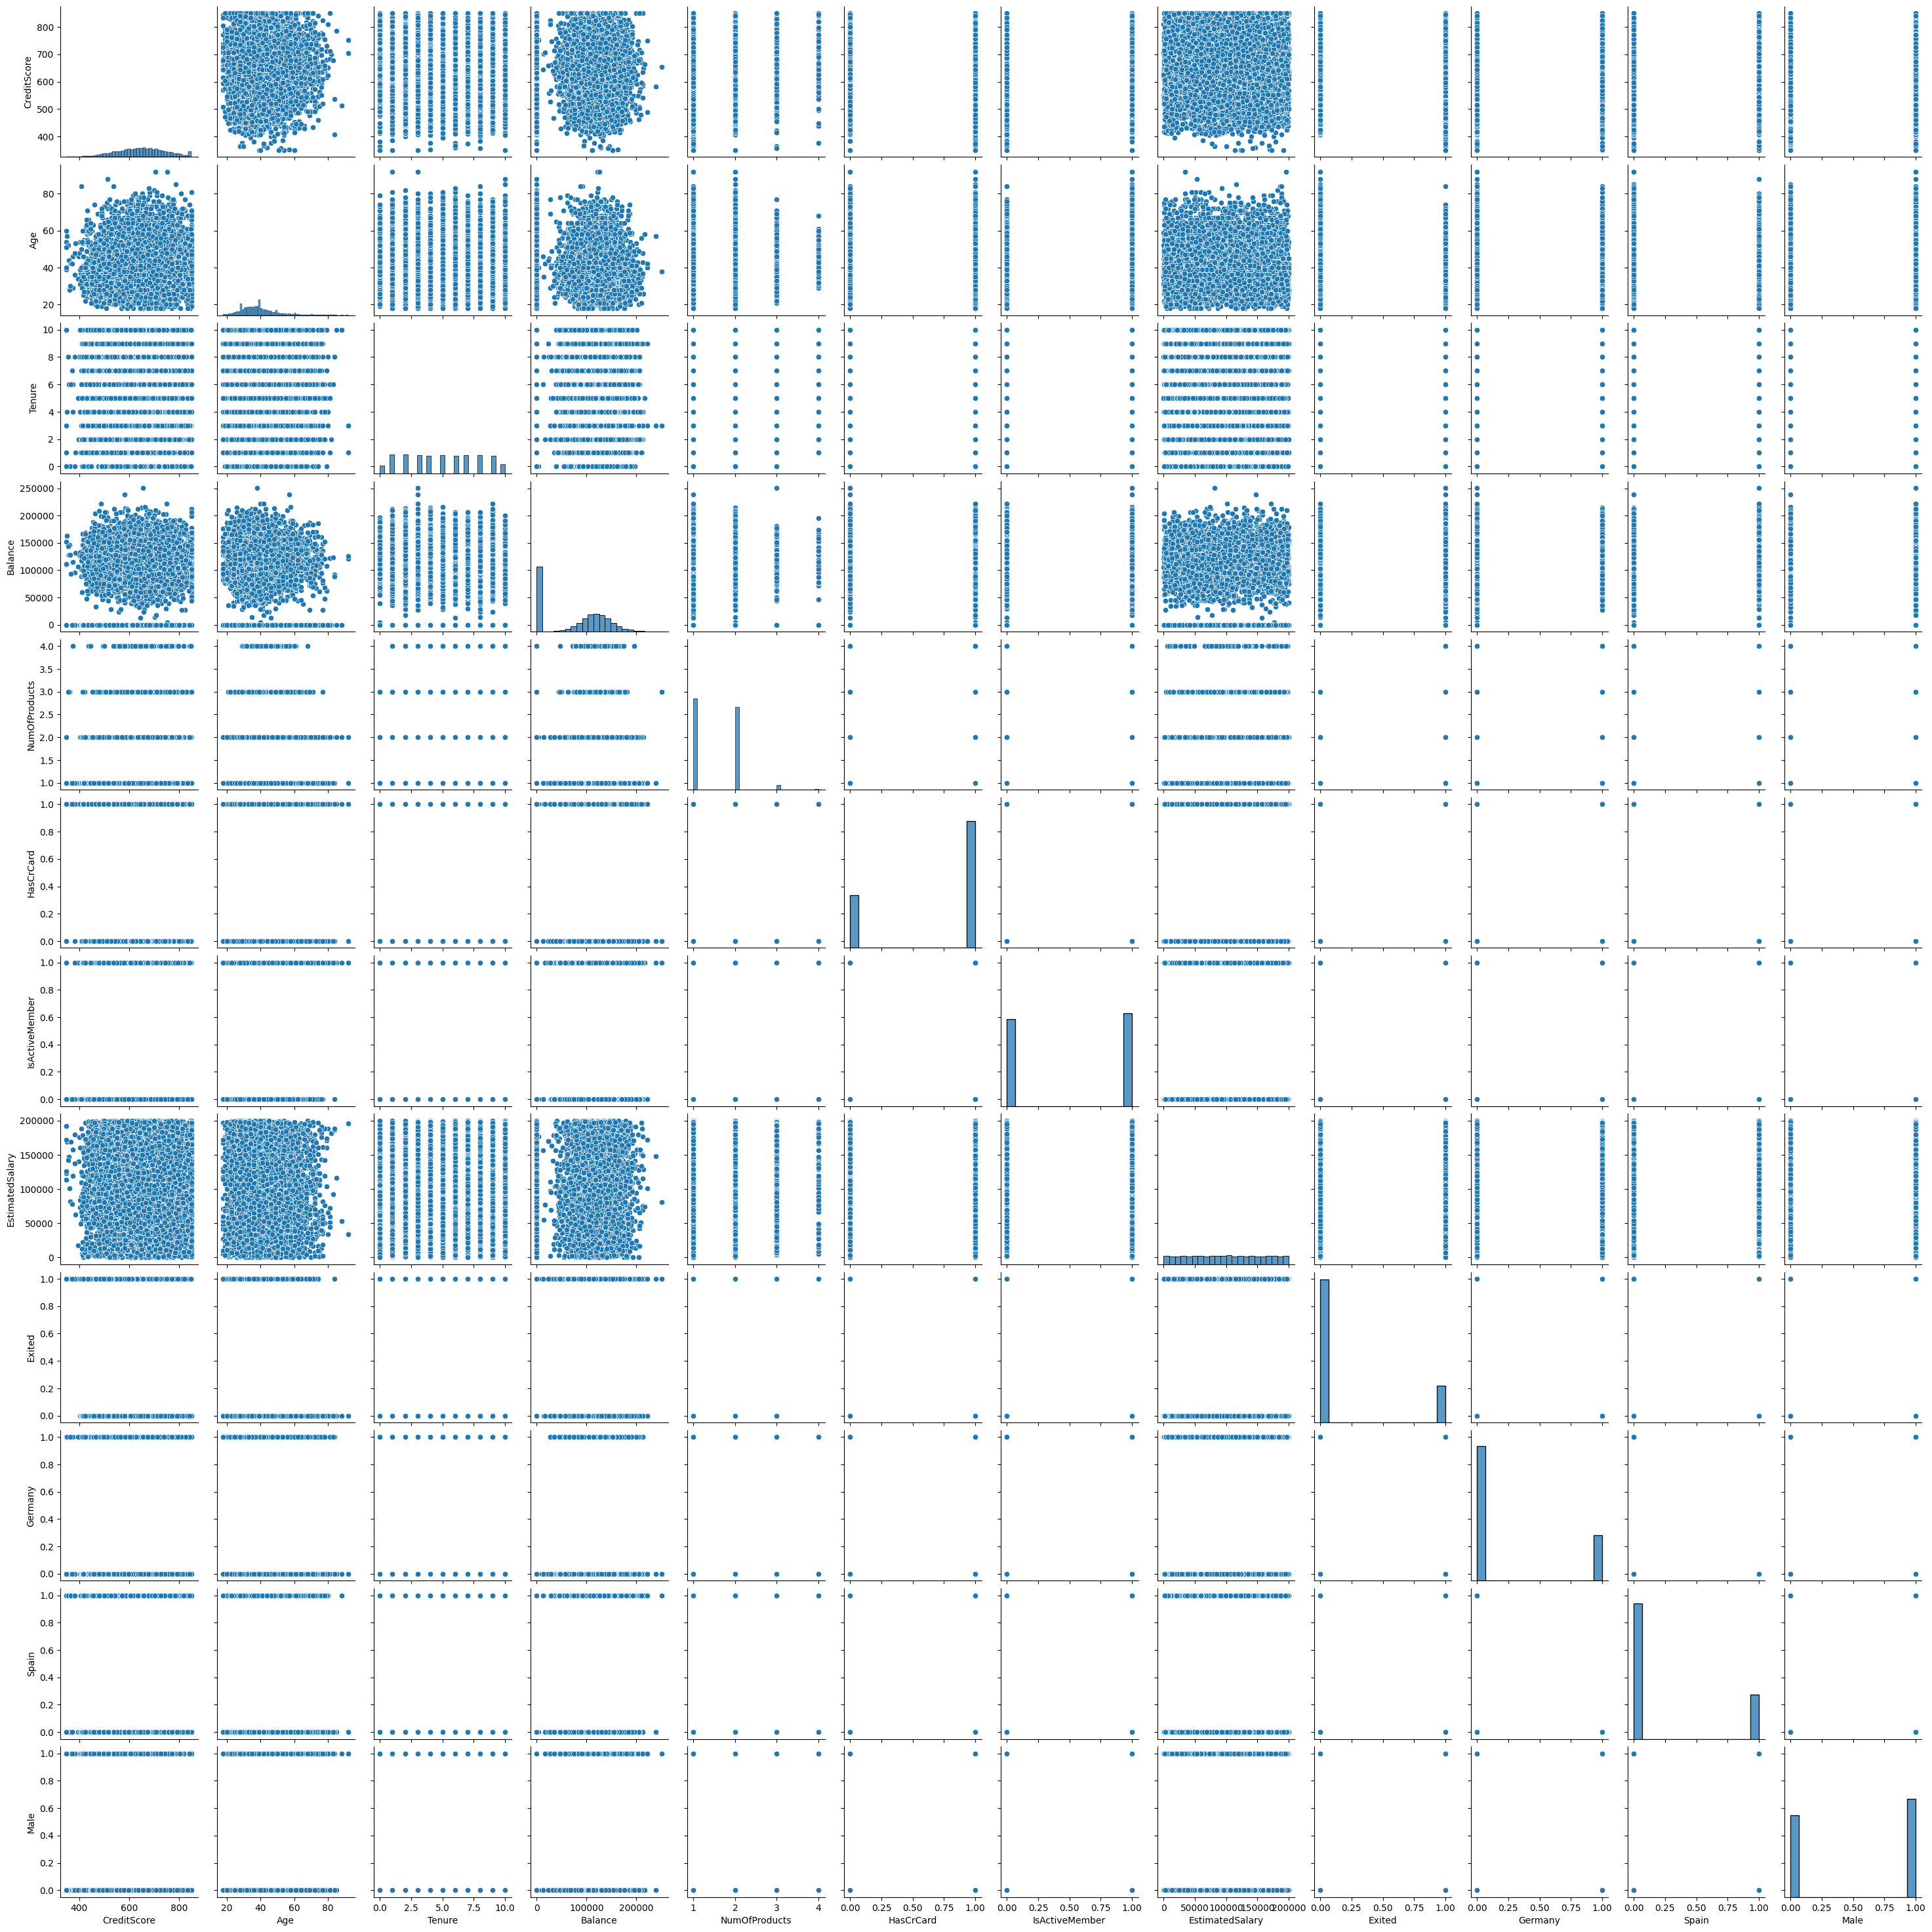

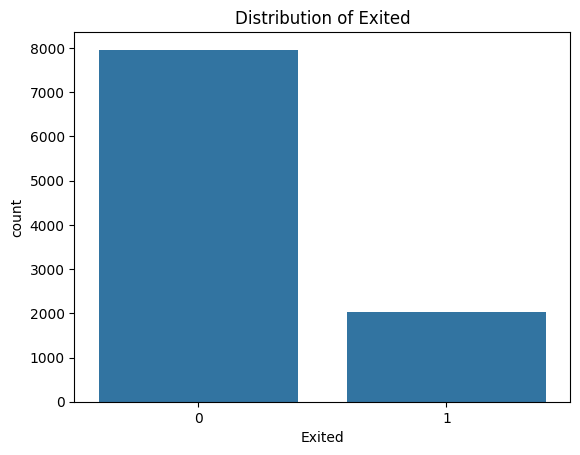

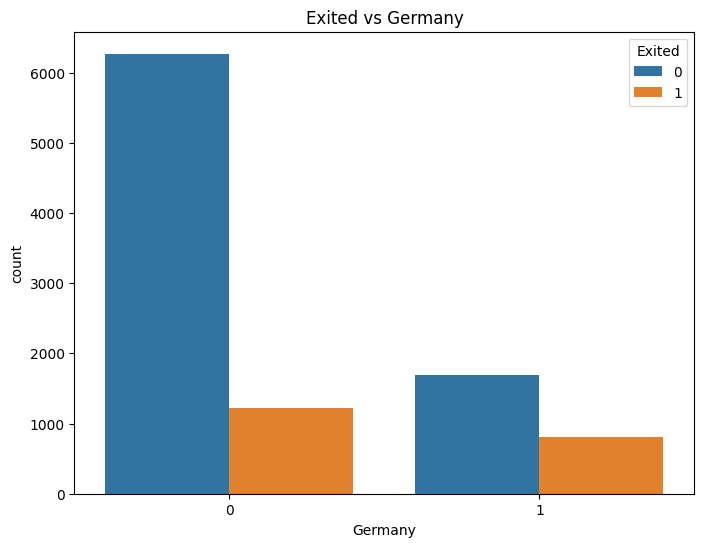

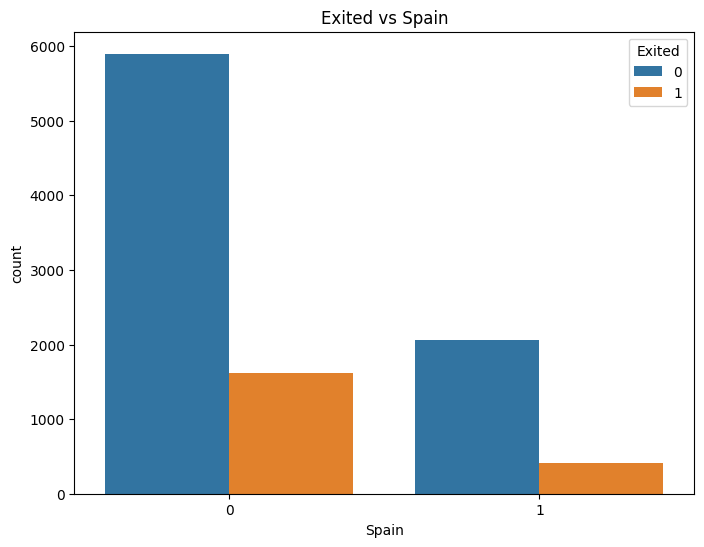

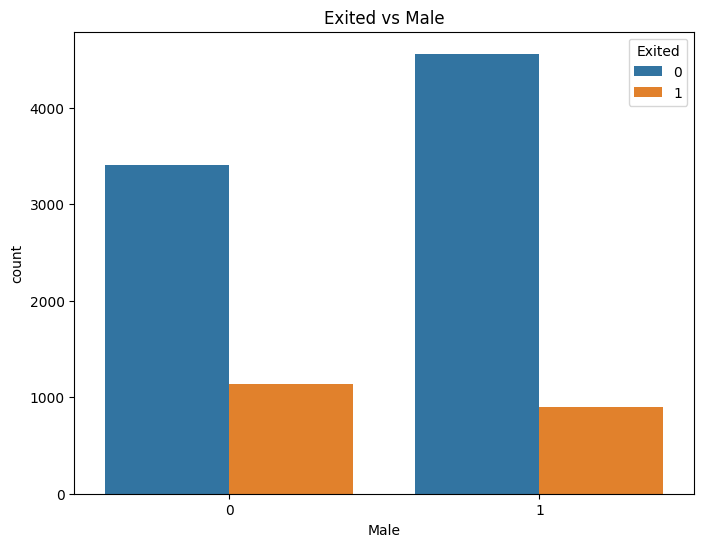

In [16]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms for numerical features
df.hist(figsize=(15, 15), bins=50)
plt.show()

# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 15))
plt.show()

# Scatter plots for relationships between features
sns.pairplot(df)
plt.show()

# Distribution of target variable
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.show()

# Analyze the relationship between categorical features and target variable
for col in ['Germany', 'Spain', 'Male']:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, hue='Exited', data=df)
  plt.title(f'Exited vs {col}')
  plt.show()





In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


In [18]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [19]:
y.value_counts()

,count
Exited,
0,7963
1,2037


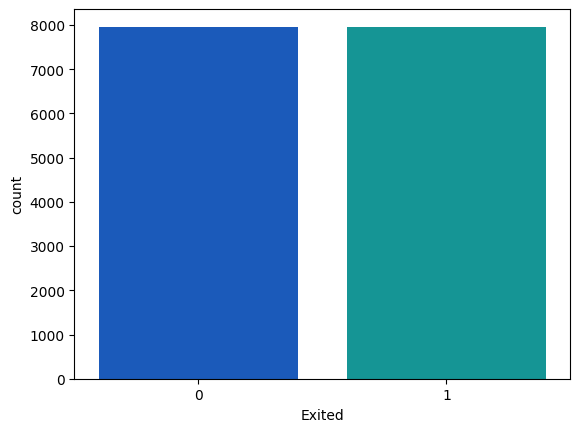

In [20]:
# Balance the data by oversampling. SMOTE had lesser results
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

# Visualize the new balance
sns.countplot(x=y, palette='winter')
plt.show()

In [21]:
y.value_counts()

,count
Exited,
1,7963
0,7963


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,19.923063,CreditScore
1,12.845139,Age
2,3.791417,Tenure
3,3.371681,Balance
4,5.732494,NumOfProducts
5,3.240611,HasCrCard
6,1.849461,IsActiveMember
7,3.897204,EstimatedSalary
8,1.981170,Germany
9,1.486283,Spain


In [23]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12740, 11) (3186, 11) (12740,) (3186,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


In [27]:
maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",(maxaccu)*100,"on Random State =",maxRS)

Best accuracy is  67.43407283382167 on Random State = 87


In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=190,test_size=.3)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
import plotly.graph_objects as go

In [30]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ET_model = ExtraTreeClassifier()
ETs_model = ExtraTreesClassifier()
BNB_model = BernoulliNB()
GNB_model = GaussianNB()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model,ET_model,ETs_model,GNB_model,BNB_model ]

Accuracy_Score of  LogisticRegression() is 65.4039347007116
F1 SCore                 66.57229524772498
Confusion Matrix of  LogisticRegression()  is 
 [[1479  916]
 [ 737 1646]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      2395
           1       0.64      0.69      0.67      2383

    accuracy                           0.65      4778
   macro avg       0.65      0.65      0.65      4778
weighted avg       0.65      0.65      0.65      4778



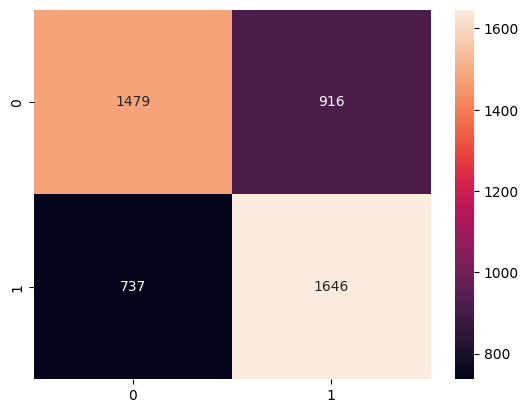

**************************************************
Accuracy_Score of  RidgeClassifier() is 69.48514022603601
F1 SCore                 69.25347954449599
Confusion Matrix of  RidgeClassifier()  is 
 [[1678  717]
 [ 741 1642]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      2395
           1       0.70      0.69      0.69      2383

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778



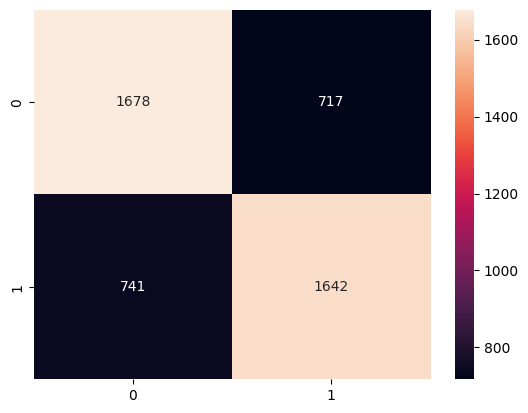

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 90.53997488488908
F1 SCore                 91.14072912583299
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[2001  394]
 [  58 2325]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2395
           1       0.86      0.98      0.91      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.90      4778
weighted avg       0.91      0.91      0.90      4778



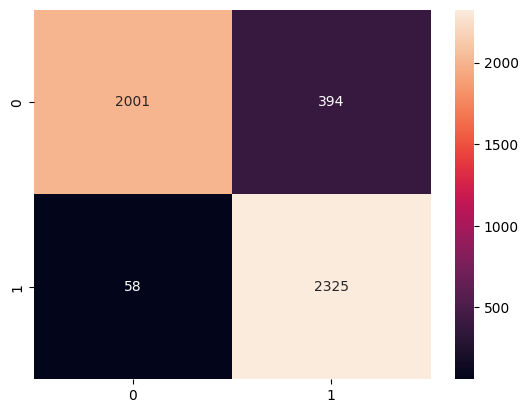

**************************************************
Accuracy_Score of  SVC() is 57.15780661364588
F1 SCore                 63.59594522496887
Confusion Matrix of  SVC()  is 
 [[ 943 1452]
 [ 595 1788]]
              precision    recall  f1-score   support

           0       0.61      0.39      0.48      2395
           1       0.55      0.75      0.64      2383

    accuracy                           0.57      4778
   macro avg       0.58      0.57      0.56      4778
weighted avg       0.58      0.57      0.56      4778



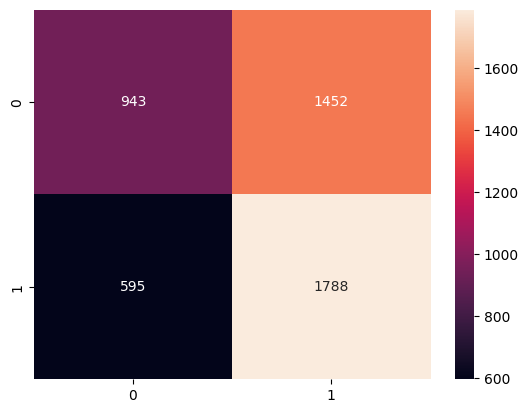

**************************************************
Accuracy_Score of  KNeighborsClassifier() is 66.8480535789033
F1 SCore                 69.96587030716724
Confusion Matrix of  KNeighborsClassifier()  is 
 [[1349 1046]
 [ 538 1845]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      2395
           1       0.64      0.77      0.70      2383

    accuracy                           0.67      4778
   macro avg       0.68      0.67      0.66      4778
weighted avg       0.68      0.67      0.66      4778



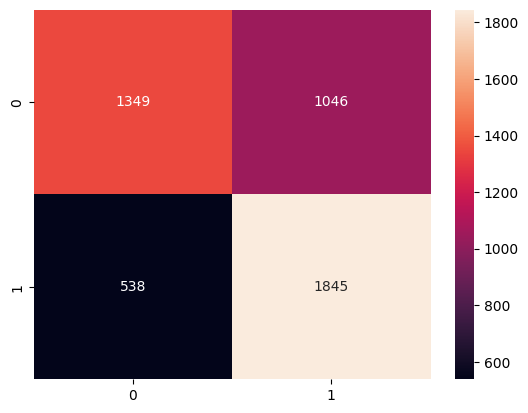

**************************************************
Accuracy_Score of  RandomForestClassifier() is 93.67936375052324
F1 SCore                 93.90637610976594
Confusion Matrix of  RandomForestClassifier()  is 
 [[2149  246]
 [  56 2327]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2395
           1       0.90      0.98      0.94      2383

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



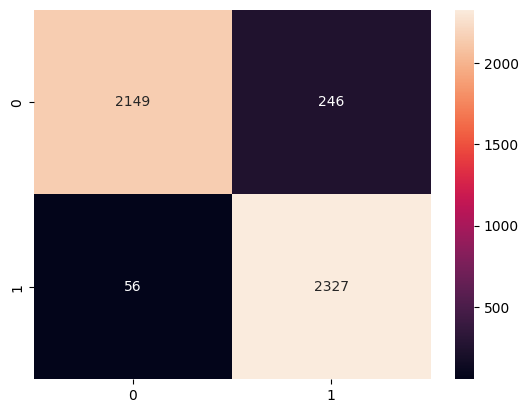

**************************************************
Accuracy_Score of  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is 88.63541230640435
F1 SCore                 88.98356664637859
Confusion Matrix of  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_by

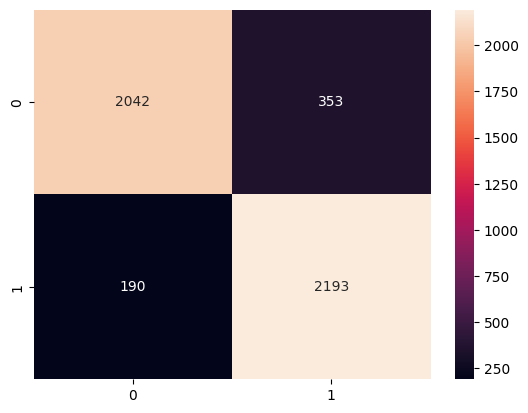

**************************************************
Accuracy_Score of  SGDClassifier() is 50.293009627459185
F1 SCore                 66.43109540636043
Confusion Matrix of  SGDClassifier()  is 
 [[  53 2342]
 [  33 2350]]
              precision    recall  f1-score   support

           0       0.62      0.02      0.04      2395
           1       0.50      0.99      0.66      2383

    accuracy                           0.50      4778
   macro avg       0.56      0.50      0.35      4778
weighted avg       0.56      0.50      0.35      4778



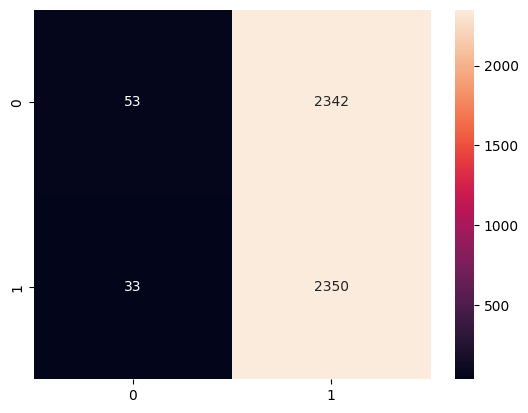

**************************************************
Accuracy_Score of  BaggingClassifier() is 92.86312264545835
F1 SCore                 93.11250252474248
Confusion Matrix of  BaggingClassifier()  is 
 [[2132  263]
 [  78 2305]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2395
           1       0.90      0.97      0.93      2383

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778



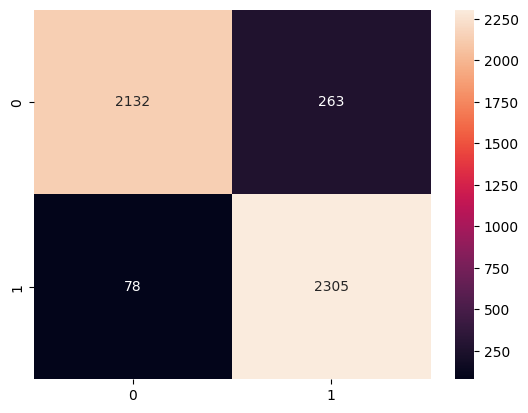

**************************************************
Accuracy_Score of  AdaBoostClassifier() is 76.64294683968188
F1 SCore                 76.1436511329628
Confusion Matrix of  AdaBoostClassifier()  is 
 [[1881  514]
 [ 602 1781]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      2395
           1       0.78      0.75      0.76      2383

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



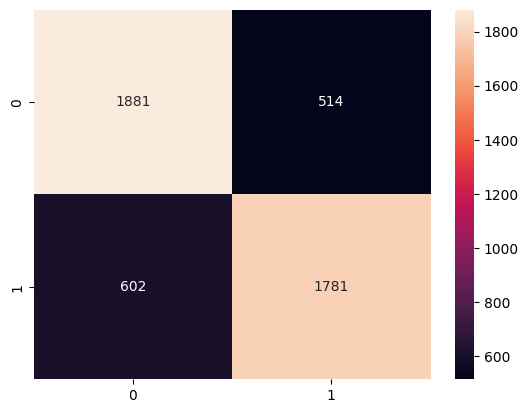

**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 78.21264127249896
F1 SCore                 77.78014941302025
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[1915  480]
 [ 561 1822]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2395
           1       0.79      0.76      0.78      2383

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



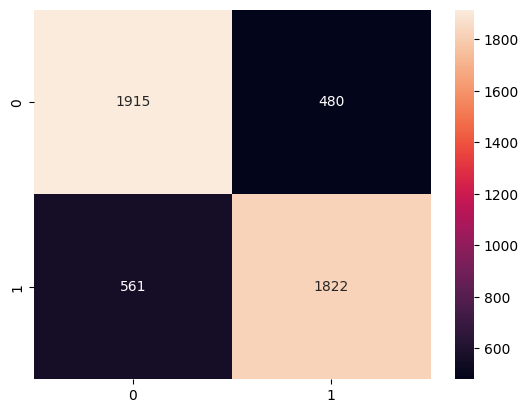

**************************************************
Accuracy_Score of  ExtraTreeClassifier() is 90.1841774801172
F1 SCore                 90.8344733242134
Confusion Matrix of  ExtraTreeClassifier()  is 
 [[1985  410]
 [  59 2324]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2395
           1       0.85      0.98      0.91      2383

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



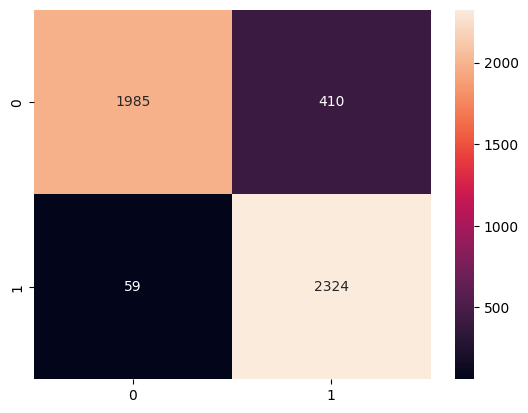

**************************************************
Accuracy_Score of  ExtraTreesClassifier() is 95.35370447886145
F1 SCore                 95.43773119605426
Confusion Matrix of  ExtraTreesClassifier()  is 
 [[2234  161]
 [  61 2322]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2395
           1       0.94      0.97      0.95      2383

    accuracy                           0.95      4778
   macro avg       0.95      0.95      0.95      4778
weighted avg       0.95      0.95      0.95      4778



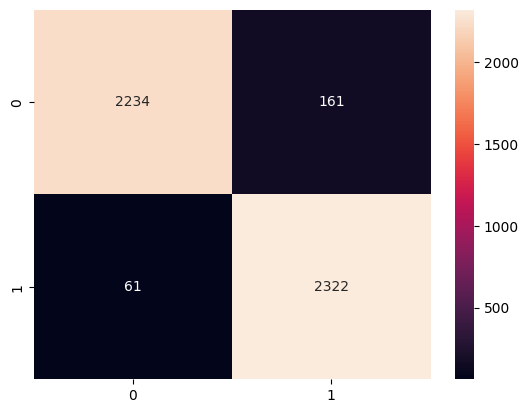

**************************************************
Accuracy_Score of  GaussianNB() is 69.50606948514022
F1 SCore                 68.65992686599269
Confusion Matrix of  GaussianNB()  is 
 [[1725  670]
 [ 787 1596]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      2395
           1       0.70      0.67      0.69      2383

    accuracy                           0.70      4778
   macro avg       0.70      0.69      0.69      4778
weighted avg       0.70      0.70      0.69      4778



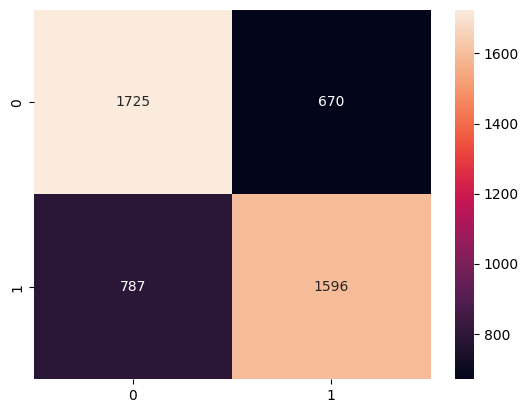

**************************************************
Accuracy_Score of  BernoulliNB() is 61.008790288823775
F1 SCore                 60.58811085254918
Confusion Matrix of  BernoulliNB()  is 
 [[1483  912]
 [ 951 1432]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      2395
           1       0.61      0.60      0.61      2383

    accuracy                           0.61      4778
   macro avg       0.61      0.61      0.61      4778
weighted avg       0.61      0.61      0.61      4778



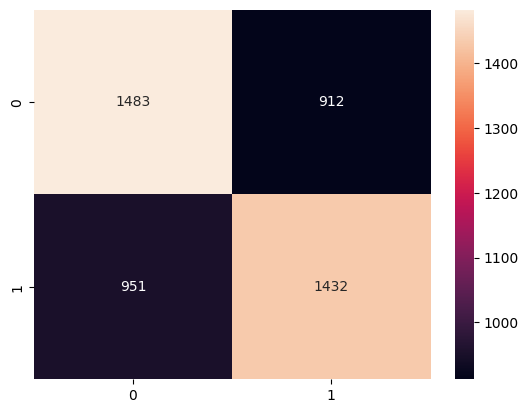

**************************************************


,Model,Accuracy,F1 Score
0,LogisticRegression(),65.40,66.57
1,RidgeClassifier(),69.49,69.25
2,DecisionTreeClassifier(),90.54,91.14
3,SVC(),57.16,63.60
4,KNeighborsClassifier(),66.85,69.97
5,"(DecisionTreeClassifier(max_features='sqrt', r...",93.68,93.91
6,"XGBClassifier(base_score=None, booster=None, c...",88.64,88.98
7,SGDClassifier(),50.29,66.43
8,(DecisionTreeClassifier(random_state=146304758...,92.86,93.11
9,"(DecisionTreeClassifier(max_depth=1, random_st...",76.64,76.14


In [31]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))

    # Gauge meter
    metric_value = accuracy_score(y_test,pred)*100
    fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
    ))

# Display the gauge
    fig.show()

    sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')
    plt.show()

    print('*'*50)

pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

In [52]:
ETs_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
from scipy.stats import randint
parameter = {"max_depth": randint(1,10),
    "max_features": ["sqrt", "log2", None],
    'random_state':randint(50,300),
    "min_samples_leaf": randint(1, 9),
    "min_samples_split": randint(2, 9),
    'n_estimators':randint(10,100),
    "criterion": ['friedman_mse', 'squared_error','gini'],
    'n_jobs':[-1]
    }



In [54]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(ETs_model,parameter,cv=5)
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788ff50b5c00>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788ff50d94b0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788ff44637c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788ff5073520>,
                                        'n_jobs': [-1],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788ff4463a60>})

In [55]:
rand_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 95,
 'n_jobs': -1,
 'random_state': 278}

In [56]:
predict = rand_search.best_estimator_.predict(X_test)
accuracy_score(y_test,predict)

0.7708246128087066

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
cm

array([[1907,  488],
       [ 607, 1776]])

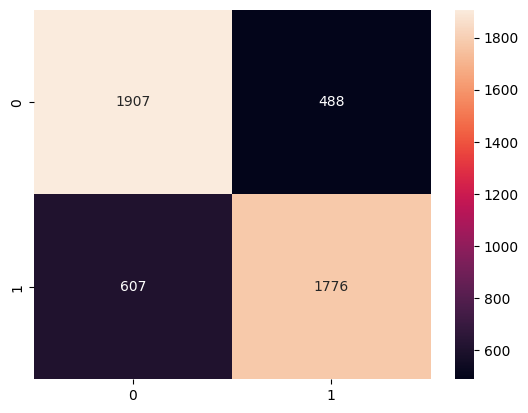

In [58]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

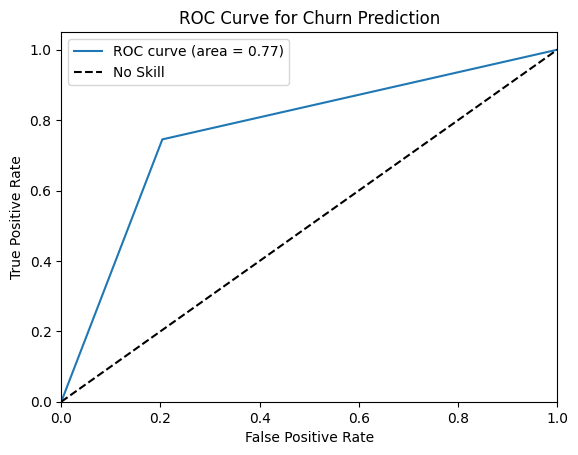

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay,auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,predict)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.legend()
plt.show()

In [60]:
import joblib
joblib.dump(ETs_model,"churn.pkl")

['churn.pkl']

In [61]:
a = np.array(y_test)
df = pd.DataFrame()
df['Prediction'] = predict
df['original'] = a
df

,Prediction,original
0,1,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
4773,0,0
4774,1,0
4775,0,0
4776,0,0


In [62]:
import plotly.graph_objects as go
print('/n')
metric_value = accuracy_score(y_test,predict) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()


/n


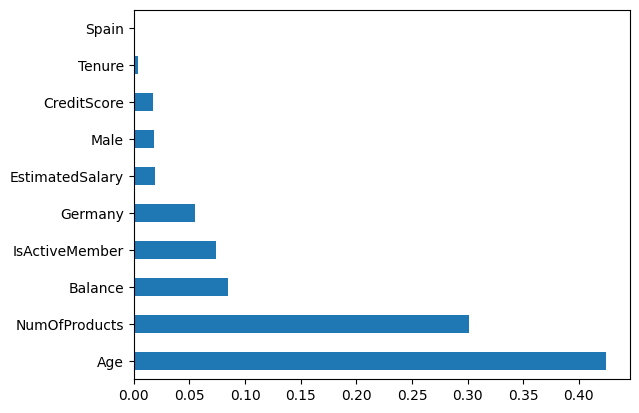

In [63]:
feat_imp = pd.Series(GB_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()